In [1]:
import sys
sys.path.append('..')
from run_fft import FFTProcessor
import numpy as np
import pandas as pd

In [2]:
# Enable rpy2
%load_ext rpy2.ipython

In [3]:
fft_processor = FFTProcessor(method='fft', 
                             preprocess='logzs', 
                             value='norm', 
                             require_sid=False)

In [40]:
# Read NLL data, apply log z-score
# est_name = 'mistral'
est_name = 'gpt2xl'

nll_pubmed_orig = fft_processor._read_data(data_file=f'../data/gpt-4/pubmed_gpt-4.original.{est_name}.nll.txt')
nll_pubmed_samp = fft_processor._read_data(data_file=f'../data/gpt-4/pubmed_gpt-4.sampled.{est_name}.nll.txt')

# Log + Z-Score NLL
fft_processor.preprocess = 'logzs'
data = fft_processor._preprocess(nll_pubmed_orig)
df_nlllogzs_orig = fft_processor._create_input_df(data)
data = fft_processor._preprocess(nll_pubmed_samp)
df_nlllogzs_samp = fft_processor._create_input_df(data)
df_nlllogzs_orig['Source'] = 'Human'
df_nlllogzs_samp['Source'] = 'Model'
df_nlllogzs = pd.concat([df_nlllogzs_orig, df_nlllogzs_samp])

[1] 0.3137099
[1] 0.6148119
[1] 0.3946504
[1] 0.5146775
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.03984 -0.95584  0.03748  0.00000  0.83362  2.54442 


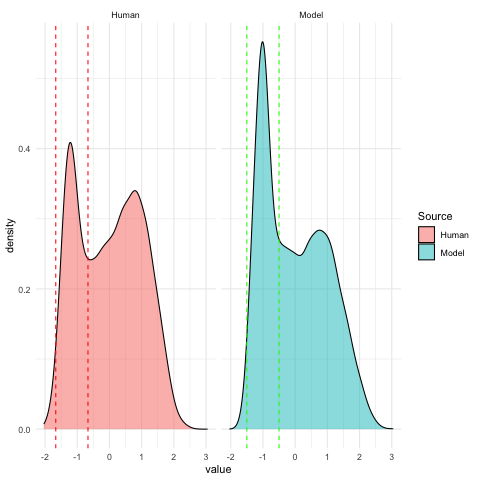

In [55]:
%%R -i df_nlllogzs
require("data.table")
require("ggplot2")

dt <- data.table(df_nlllogzs)
# nrow(dt)

# Density plot
# plot(density(dt[Source == "Human"]$value))

vline.dat <- data.table(Source=c("Human", "Human", "Model", "Model"), 
                        pos=c("left", "right", "left", "right"),
                        val=c(-1.667, -0.667, -1.5, -.5))
p <- ggplot(dt, aes(x=value, fill=Source)) + geom_density(alpha=0.5) + theme_minimal() + 
    facet_wrap(~Source) +
    geom_vline(vline.dat[Source=="Human" & pos=="left"], mapping=aes(xintercept=val), colour="red", linetype="dashed") + 
    geom_vline(vline.dat[Source=="Human" & pos=="right"], mapping=aes(xintercept=val), colour="red", linetype="dashed") + 
    geom_vline(vline.dat[Source=="Model" & pos=="left"], mapping=aes(xintercept=val), colour="green", linetype="dashed") + 
    geom_vline(vline.dat[Source=="Model" & pos=="right"], mapping=aes(xintercept=val), colour="green", linetype="dashed")
plot(p)

# Mistral results
# print(nrow(dt[Source == "Human" & value > -1.5 & value <= -0.5]) / nrow(dt[Source == "Human"])) # 0.4091184, left peak
# print(nrow(dt[Source == "Human" & value > -0.5 & value <= 2]) / nrow(dt[Source == "Human"])) # 0.5674812, right plateau

# GPT2-xl results
print(nrow(dt[Source == "Human" & value > -1.667 & value <= -0.667]) / nrow(dt[Source == "Human"])) #
print(nrow(dt[Source == "Human" & value > -0.667 & value <= 1.5]) / nrow(dt[Source == "Human"])) #
print(nrow(dt[Source == "Model" & value > -1.5 & value <= -0.5]) / nrow(dt[Source == "Model"])) #
print(nrow(dt[Source == "Model" & value > -0.5 & value <= 1.5]) / nrow(dt[Source == "Model"])) #


summary(dt[Source == "Human"]$value)